# importing libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading data

In [8]:
data = pd.read_csv('CWG Ranking.csv')

In [9]:
data

,Rank,CGA,Gold,Silver,Bronze,Total
0,1,Australia,67,57,54,178
1,2,England,57,66,53,176
2,3,Canada,26,32,34,92
3,4,India,22,16,23,61
4,5,New Zealand,20,12,17,49
5,6,Scotland,13,11,27,51
6,7,Nigeria,12,9,14,35
7,8,Wales,8,6,14,28
8,9,South Africa,7,9,11,27
9,10,Malaysia,7,8,8,23


In [10]:
data.head()

,Rank,CGA,Gold,Silver,Bronze,Total
0,1,Australia,67,57,54,178
1,2,England,57,66,53,176
2,3,Canada,26,32,34,92
3,4,India,22,16,23,61
4,5,New Zealand,20,12,17,49



# Data Cleaning

Renaming colomns to be more understandble
-column name explanations are:
 * Rank = Ranking of teams 
 * CGA = Countries of teams > countryName
 * Gold = Gold medals won > TotalGoldMedal
 * Silver = Silver medals won > TotalSilverMedal
 * Bronze = Bronze medals won > TotalBronzeMedal
 * Total = Sum of all medals > TotalMedal

In [11]:
#renaming Colomn dictionary

dictRename = {
    'CGA': 'CountryName', 
    'Gold': 'TotalGoldMedal',
    'Silver': 'TotalSilverMedal', 
    'Bronze': 'TotalBronzeMedal',
    'Total': 'TotalMedal'
}
data.rename(columns = dictRename,inplace=True)
data.head()

,Rank,CountryName,TotalGoldMedal,TotalSilverMedal,TotalBronzeMedal,TotalMedal
0,1,Australia,67,57,54,178
1,2,England,57,66,53,176
2,3,Canada,26,32,34,92
3,4,India,22,16,23,61
4,5,New Zealand,20,12,17,49


In [12]:
#checking Null Value

data.isnull().sum()

Rank                0
CountryName         0
TotalGoldMedal      0
TotalSilverMedal    0
TotalBronzeMedal    0
TotalMedal          0
dtype: int64

# Data preprocessing

In [13]:
#checking column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              43 non-null     int64 
 1   CountryName       43 non-null     object
 2   TotalGoldMedal    43 non-null     int64 
 3   TotalSilverMedal  43 non-null     int64 
 4   TotalBronzeMedal  43 non-null     int64 
 5   TotalMedal        43 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


# Exploratory Data Analysis(EDA)

In [14]:
#Question
 # 1. How is the descriptive analysis of the data?
 # 2. What are ten countries with highest number of Gold medal? 
 # 3. What are ten countries with highest number of Silver medal?
 # 4. What are ten countries with highest number of Bronze medal?
 # 5. What are ten countries with highest number of medal?
 # 6. How is the distribution of Total Gold Medal between the Countries?
 # 7. Are Total Gold,Silver,Bronze medal affect the country rank in 2022 common wealth games standings?


In [15]:
#the descriptive analysis of the data
data.describe()

,Rank,TotalGoldMedal,TotalSilverMedal,TotalBronzeMedal,TotalMedal
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,21.604651,6.511628,6.558140,7.325581,20.395349
std,12.146212,13.905073,13.593245,12.859536,39.882052
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,11.500000,0.000000,1.000000,1.000000,2.000000
50%,20.000000,1.000000,2.000000,2.000000,4.000000
75%,32.500000,6.500000,6.000000,7.000000,19.500000
max,40.000000,67.000000,66.000000,54.000000,178.000000


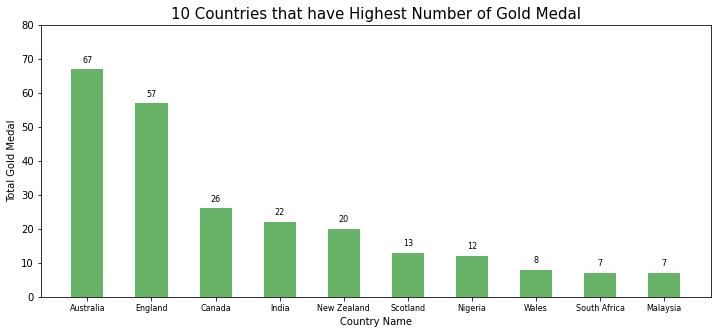

In [16]:
#ten countries with highest number of Gold medal
TotalGold = data[['CountryName','TotalGoldMedal']].sort_values('TotalGoldMedal', ascending = False).head(10).copy()

#Removing the Index
TotalGold = TotalGold.reset_index(drop = True)

#Visualization 

fig1 = plt.figure(figsize = (12,5))
plt.bar(data = TotalGold, x = 'CountryName', height = 'TotalGoldMedal', width = 0.5, color = 'green', alpha = 0.6)
plt.xlabel('Country')
plt.ylabel('Total Gold Medal')
plt.xticks(fontsize = 8,ha = 'center', rotation = 0)
plt.title('10 Countries that have Highest Number of Gold Medal', fontsize = 15)

#showing number of gold medal for each country on the chart
for i in range(len(TotalGold)):
    position = TotalGold['CountryName'].loc[i]
    height = TotalGold['TotalGoldMedal'].loc[i] +2 
    text = str(TotalGold['TotalGoldMedal'].loc[i])
    plt.text(position,height,text, ha = 'center', fontsize = 8)
    plt.ylim(0,80)
    
    
    


In [17]:
fig1.savefig("gold.jpeg")

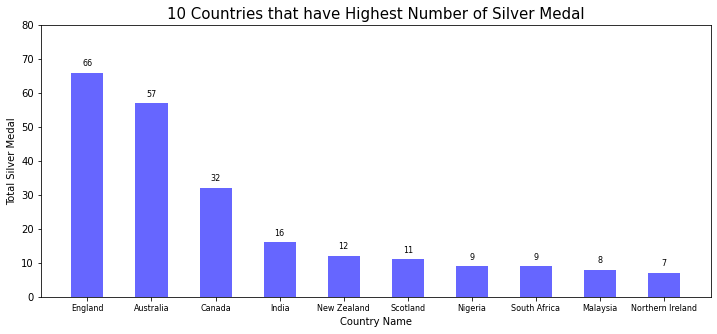

In [20]:
#ten countries with highest number of Silver medal
TotalSilver = data[['CountryName','TotalSilverMedal']].sort_values('TotalSilverMedal', ascending = False).head(10).copy()

#Removing the Index
TotalSilver = TotalSilver.reset_index(drop = True)

#Visualization 
fig2 = plt.figure(figsize = (12,5))
plt.bar(data = TotalSilver, x = 'CountryName', height = 'TotalSilverMedal', width = 0.5, color = 'blue', alpha = 0.6)
plt.xlabel('Country Name')
plt.ylabel('Total Silver Medal')
plt.xticks(fontsize = 8,ha = 'center', rotation = 0)
plt.title('10 Countries that have Highest Number of Silver Medal', fontsize = 15)

#showing number of Silver medal for each country on the chart
for i in range(len(TotalSilver)):
    position = TotalSilver['CountryName'].loc[i]
    height = TotalSilver['TotalSilverMedal'].loc[i] +2 
    text = str(TotalSilver['TotalSilverMedal'].loc[i])
    plt.text(position,height,text, ha = 'center', fontsize = 8)
    plt.ylim(0,80)

In [21]:
fig2.savefig("silver.jpeg")

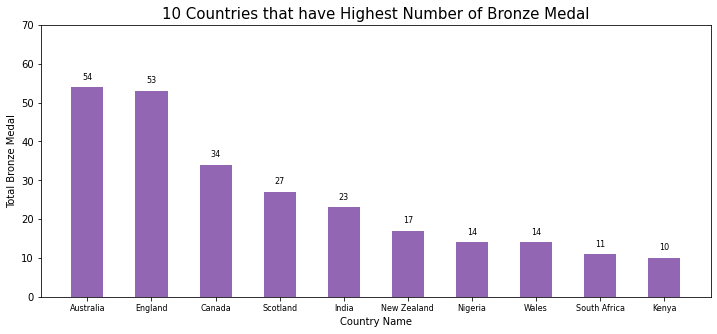

In [22]:
#ten countries with highest number of Bronze medal
TotalBronze = data[['CountryName','TotalBronzeMedal']].sort_values('TotalBronzeMedal', ascending = False).head(10).copy()

#Removing the Index
TotalBronze = TotalBronze.reset_index(drop = True)

#Visualization 
fig3 = plt.figure(figsize = (12,5))
plt.bar(data = TotalBronze, x = 'CountryName', height = 'TotalBronzeMedal', width = 0.5, color = 'indigo', alpha = 0.6)
plt.xlabel('Country Name')
plt.ylabel('Total Bronze Medal')
plt.xticks(fontsize = 8,ha = 'center', rotation = 0)
plt.title('10 Countries that have Highest Number of Bronze Medal', fontsize = 15)

#showing number of Bronze medal for each country on the chart
for i in range(len(TotalBronze)):
    position = TotalBronze['CountryName'].loc[i]
    height = TotalBronze['TotalBronzeMedal'].loc[i] +2 
    text = str(TotalBronze['TotalBronzeMedal'].loc[i])
    plt.text(position,height,text, ha = 'center', fontsize = 8)
    plt.ylim(0,70)

In [37]:
fig3.savefig("bronze.jpeg")

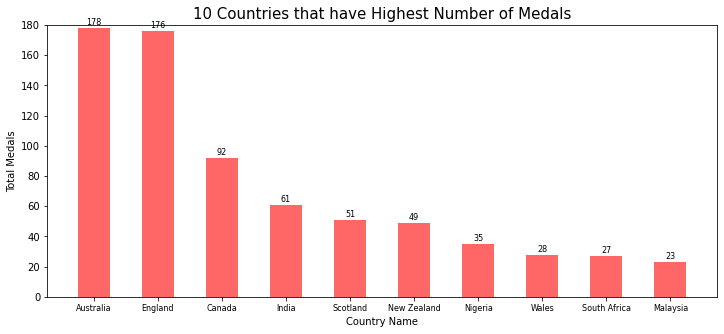

In [25]:
#ten countries with highest number of medal
TotalMedal = data[['CountryName','TotalMedal']].sort_values('TotalMedal', ascending = False).head(10).copy()

#Removing the Index
TotalMedal = TotalMedal.reset_index(drop = True)

#Visualization 
fig4 = plt.figure(figsize = (12,5))
plt.bar(data = TotalMedal, x = 'CountryName', height = 'TotalMedal', width = 0.5, color = 'red', alpha = 0.6)
plt.xlabel('Country Name')
plt.ylabel('Total Medals')
plt.xticks(fontsize = 8,ha = 'center', rotation = 0)
plt.title('10 Countries that have Highest Number of Medals', fontsize = 15)

#showing number of gold medal for each country on the chart
for i in range(len(TotalMedal)):
    position = TotalMedal['CountryName'].loc[i]
    height = TotalMedal['TotalMedal'].loc[i] +2 
    text = str(TotalMedal['TotalMedal'].loc[i])
    plt.text(position,height,text, ha = 'center', fontsize = 8)
    plt.ylim(0,180)

In [27]:
fig4.savefig("10Countries.jpeg")

# distribution of total medals between the countries

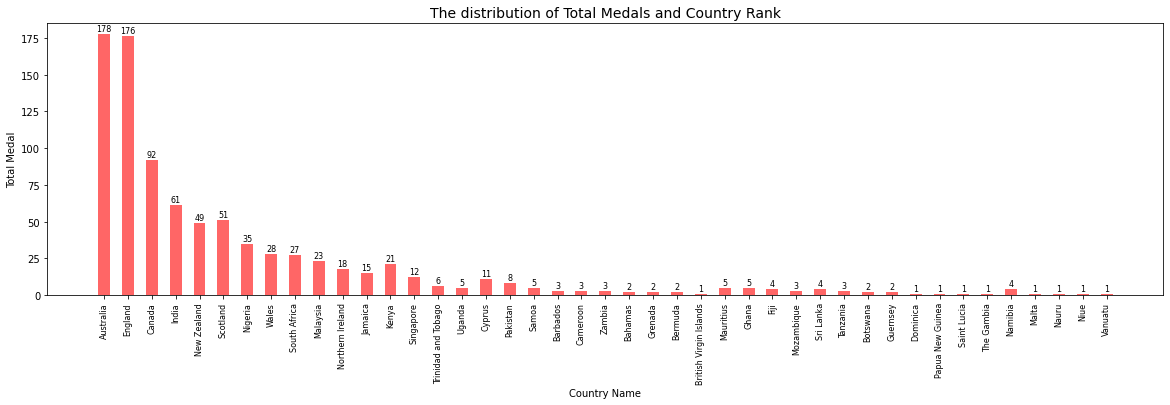

In [33]:
fig5 = plt.figure(figsize=(20,5))
plt.bar(data = data, x = 'CountryName', height = 'TotalMedal', width = 0.5, color ='red', alpha = 0.6)
plt.xticks(fontsize = 8, rotation = 90, ha = 'center')
plt.ylim(0,185)
plt.xlabel('Country Name')
plt.ylabel('Total Medal')
plt.title('The distribution of Total Medals and Country Rank', fontsize = 14)
for i in range(len(data)):
    position = data['CountryName'].loc[i]
    height = data['TotalMedal'].loc[i]+2
    text = str(data['TotalMedal'].loc[i])
    plt.text(position,height,text,ha = 'center', fontsize = 8)
    

In [34]:
fig5.savefig("AllCountries.jpeg")

# distribution of total medals with scatter plot

Text(0, 0.5, 'Total Medal')

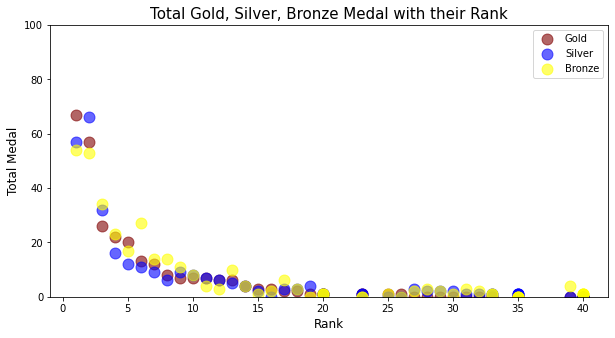

In [35]:
fig6 = plt.figure(figsize = (10,5))
plt.scatter(data = data, x = 'Rank', y = 'TotalGoldMedal', color = 'maroon', alpha = 0.6, s = 120)
plt.scatter(data = data, x = 'Rank', y = 'TotalSilverMedal', color = 'blue', alpha = 0.6, s = 120)
plt.scatter(data = data, x = 'Rank', y = 'TotalBronzeMedal', color = 'yellow', alpha = 0.6, s = 120)
plt.legend(['Gold','Silver','Bronze'])
plt.title('Total Gold, Silver, Bronze Medal with their Rank', size =15)
plt.xlabel('Rank', size = 12)
plt.ylim(0,100)
plt.ylabel('Total Medal', size = 12)

In [36]:
fig6.savefig("scatter.jpeg")

# Are Total Gold,Silver,Bronze medal affect the country rank in 2022 common wealth games standings?

Anwser:
The Total medals won by each country affected their rank, most especially the top 3 countries where you can see Australia has more gold medal than England and England has more silver medal than Australia but Australia has to come 1st on total medals won by each country.